In [86]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [126]:
churn_data = pd.read_csv('../pandas-numpy-practices/churn.csv')

In [127]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
len(churn_data.columns)

21

In [130]:
churn_data.iloc[:, :10].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [131]:
churn_data.iloc[:, 10:].head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [132]:
churn_data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [133]:
churn_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [134]:
cols_to_binary_encode = [] # 0, 1로만 바꿀 수 있는 애들 저장할 리스트
cols_to_one_hot_encode = [] # 0, 1로만 바꿀 수 없는 애들 저장할 리스트

for col in churn_data.columns: # 전체 데이터의 컬럼 이름으로 loop
    if col not in ['MonthlyCharges', 'TotalCharges']: # MonthlyCharges, TotalCharges 컬럼이 아니면
        # 컬럼 이름, 컬럼의 unique 값들의 갯수, 컬럼의 unique 값 리스트 출력
        print(col, len(churn_data[col].unique()), churn_data[col].unique(), end='\n---\n')
        
        # 컬럼의 unique 값들의 갯수 카운트
        if len(churn_data[col].unique()) == 2:
            cols_to_binary_encode.append([col, churn_data[col].unique()])
        elif len(churn_data[col].unique()) > 2:
            cols_to_one_hot_encode.append([col, churn_data[col].unique()])

customerID 7043 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
gender 2 ['Female' 'Male']
---
SeniorCitizen 2 [0 1]
---
Partner 2 ['Yes' 'No']
---
Dependents 2 ['No' 'Yes']
---
tenure 73 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
---
PhoneService 2 ['No' 'Yes']
---
MultipleLines 3 ['No phone service' 'No' 'Yes']
---
InternetService 3 ['DSL' 'Fiber optic' 'No']
---
OnlineSecurity 3 ['No' 'Yes' 'No internet service']
---
OnlineBackup 3 ['Yes' 'No' 'No internet service']
---
DeviceProtection 3 ['No' 'Yes' 'No internet service']
---
TechSupport 3 ['No' 'Yes' 'No internet service']
---
StreamingTV 3 ['No' 'Yes' 'No internet service']
---
StreamingMovies 3 ['No' 'Yes' 'No internet service']
---
Contract 3 ['Month-to-month' 'One year' 'Two year']
---
PaperlessBilling 2 ['Ye

In [135]:
cols_to_binary_encode

[['gender', array(['Female', 'Male'], dtype=object)],
 ['SeniorCitizen', array([0, 1])],
 ['Partner', array(['Yes', 'No'], dtype=object)],
 ['Dependents', array(['No', 'Yes'], dtype=object)],
 ['PhoneService', array(['No', 'Yes'], dtype=object)],
 ['PaperlessBilling', array(['Yes', 'No'], dtype=object)],
 ['Churn', array(['No', 'Yes'], dtype=object)]]

In [136]:
churn_data['gender'] = churn_data['gender'].apply(lambda x: 0 if x == 'Female' else 1)
churn_data['Partner'] = churn_data['Partner'].apply(lambda x: 0 if x == 'No' else 1)
churn_data['Dependents'] = churn_data['Dependents'].apply(lambda x: 0 if x == 'No' else 1)
churn_data['PhoneService'] = churn_data['PhoneService'].apply(lambda x: 0 if x == 'No' else 1)
churn_data['PaperlessBilling'] = churn_data['PaperlessBilling'].apply(lambda x: 0 if x == 'No' else 1)
churn_data['Churn'] = churn_data['Churn'].apply(lambda x: 0 if x == 'No' else 1)

- (lambda number: 0 if (condition) else 1)
- number라고 값을 받아서
- condition을 만족한다면
- 0으로 return한다
- condition을 만족하지 않는다면
- 1로 return한다

In [137]:
cols_to_one_hot_encode

[['customerID',
  array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
         '8361-LTMKD', '3186-AJIEK'], dtype=object)],
 ['tenure',
  array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
         21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
          9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
         36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
         54, 51, 26,  0, 39])],
 ['MultipleLines', array(['No phone service', 'No', 'Yes'], dtype=object)],
 ['InternetService', array(['DSL', 'Fiber optic', 'No'], dtype=object)],
 ['OnlineSecurity', array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['OnlineBackup', array(['Yes', 'No', 'No internet service'], dtype=object)],
 ['DeviceProtection',
  array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['TechSupport', array(['No', 'Yes', 'No internet service'], dtype=object)],
 ['StreamingTV', array(['No', 'Yes', 'No

In [138]:
pd.get_dummies(churn_data['MultipleLines'], prefix="MultipleLines")

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,0,1,0
7041,0,0,1


In [139]:
for colname, uniques in cols_to_one_hot_encode:
    if colname not in ['customerID', 'tenure']:
        dummies = pd.get_dummies(churn_data[colname], prefix=colname)
        churn_data = pd.concat([churn_data, dummies], axis=1)
        churn_data = churn_data.drop(colname, axis=1)

In [140]:
churn_data = churn_data.drop('customerID', axis=1)

In [141]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [142]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].apply(lambda x: 0 if x==' ' else float(x))

In [143]:
churn_y = churn_data['Churn']
churn_X = churn_data.drop('Churn', axis=1)

In [144]:
churn_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   MultipleLines_No                         7043 non-null   uint8  
 10  MultipleLines_No phone service           7043 no

In [145]:
X_train, X_test, y_train, y_test = train_test_split(churn_X, churn_y, test_size=0.3, random_state=10)

In [146]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=i)
dt_gini.fit(X_train, y_train)
dt_gini.score(X_test, y_test)

0.7316611452910554

In [150]:
train_Gini, test_Gini = [], []

for i in range(1, 16):
    dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dt_gini.fit(X_train, y_train)
    
    train_acc = dt_gini.score(X_train, y_train)
    train_Gini.append(train_acc)
    test_acc = dt_gini.score(X_test, y_test)
    test_Gini.append(test_acc)
    

In [151]:
train_Gini

[0.7338742393509128,
 0.7655172413793103,
 0.7914807302231237,
 0.7957403651115619,
 0.8093306288032455,
 0.8133874239350912,
 0.8281947261663286,
 0.8446247464503043,
 0.865314401622718,
 0.8929006085192698,
 0.9150101419878296,
 0.9365111561866126,
 0.9561866125760649,
 0.9699797160243407,
 0.9823529411764705]

In [152]:
test_Gini

[0.7363937529578798,
 0.7553241836251775,
 0.7903454803596782,
 0.7950780880265026,
 0.7941315664931378,
 0.7865593942262187,
 0.7851396119261713,
 0.7733080927591103,
 0.7600567912920019,
 0.7605300520586843,
 0.7415996213913867,
 0.7359204921911974,
 0.7212494084240416,
 0.7259820160908661,
 0.7307146237576905]

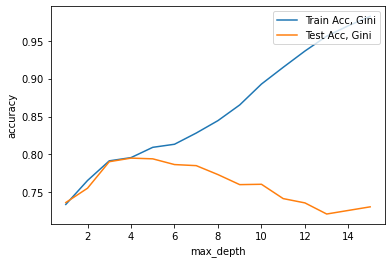

In [153]:
iter_ranges = np.linspace(1, 15, num=15)
plt.plot(iter_ranges, train_Gini, label="Train Acc, Gini")
plt.plot(iter_ranges, test_Gini, label="Test Acc, Gini")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
plt.show()